<a href="https://colab.research.google.com/github/khatgarhaastha/MSAI339_HW1/blob/main/Aastha_Khatgarh_MSAI339_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 1**

The purpose of Homework 1 is to use Python to perform data analysis to solve some business questions related to a hotels business.<br>
<br>


In [234]:
#code to directly monunt the datasets from google drive

#from google.colab import drive
#drive.mount('/content/drive')


Some useful libraries - more could be necessary

In [235]:
import pandas as pd #used for data manipulatoin and analysis, particularly tables
import matplotlib.pyplot as plt #Basic plotting library
import seaborn as sns #Build on matplotlib, provides visually appealing plots
import numpy as np #For numerical computations
import re #commonly used for string matching, search and manipulation operations

Question 0: Import the hotels data into your environment, and generate a unique ID.



**Adding id as a unique identifier**

In [236]:
#file_path = '/content/drive/MyDrive/MSAI339 HW1/hotel_data.csv'

In [237]:
print('Upload the hotel_data.csv file')

Upload the hotel_data.csv file


In [238]:
#df = pd.read_csv(file_path) #Loading data from csv file into a pandas dataframe 'df' through drive

df = pd.read_csv('hotel_data.csv')
df['id'] = df.index + 1 # Adding an id colums which starts from 1 and increments for each row

# After printing the columns list, id column was at the end, below code snippet is to move id to the front

col_list = list(df.columns)
if 'id' in col_list:
  col_list.remove('id')
  col_list.insert(0,'id')

df = df[col_list]


l = list(df.columns)
print('Total columns including id:', len(l))
print('List of columns in hotel_data.csv file:', l, "\n\n")

df.head().style

Total columns including id: 33
List of columns in hotel_data.csv file: ['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date'] 




,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.000000,0,0,Check-Out,2015-07-01
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,nan,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,nan,0,Transient,98.000000,0,1,Check-Out,2015-07-03


Question 1: Create a function that displays the data type, number and percentage of null values, and number of unique values for each column of a given dataframe. (5 points)

In [239]:
def data_types(df):
  return df.dtypes

def number_of_nulls(df):
  return df.isna().sum()

def percentage_of_nulls(df):
  return (df.isna().sum() / len(df)) * 100

def number_of_unique_values(df):
  return df.nunique()

# Combine the above functions to produce a comphrensive data frame that display the data asked

def display_data(df):
  table = pd.DataFrame({
      'Column Name' : df.columns,
      'Data Type' : data_types(df),
      'Number of Nulls' : number_of_nulls(df),
      'Percentage of Nulls' : percentage_of_nulls(df),
      'Number of unique values in each column' : number_of_unique_values(df)
  })
  return table
analysis = display_data(df)
analysis.style.hide_index()# printing the required dataframe


<ipython-input-239-19578e6eddf1>:25: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  analysis.style.hide_index()# printing the required dataframe


Column Name,Data Type,Number of Nulls,Percentage of Nulls,Number of unique values in each column
id,int64,0,0.000000,119390
hotel,object,0,0.000000,2
is_canceled,int64,0,0.000000,2
lead_time,int64,0,0.000000,479
arrival_date_year,int64,0,0.000000,3
arrival_date_month,object,0,0.000000,12
arrival_date_week_number,int64,0,0.000000,53
arrival_date_day_of_month,int64,0,0.000000,31
stays_in_weekend_nights,int64,0,0.000000,17
stays_in_week_nights,int64,0,0.000000,35


Question 2A: Find the total number of visitors who have canceled a reservation. (1.5 points)

In [240]:
# in 'is_canceled' column cancelled reservations are assigned 1 and not cancelled are 0, therefore to calculate
# cancled reservations we simply add all the rows assigned 1

total_canceled = df['is_canceled'].sum()
print(f"Total number of visitors who have canceled a reservation: {total_canceled}")

Total number of visitors who have canceled a reservation: 44224


Question 2B: Which month has the most cancellations? (1.5 points)

In [241]:
# 1. Filtering the cancelled reservations
canceled_reservations = df[df['is_canceled'] == 1]

# 2. Grouping by month and counting cancellations for each month
cancellations_by_month = canceled_reservations.groupby('arrival_date_month').size()

# 3. Finding month with most cancellations
most_cancellations_month = cancellations_by_month.idxmax()

print(f'Month with most cancellations: {most_cancellations_month}')


Month with most cancellations: August


Question 2C: Plot the number of cancellations per month in a histogram. (2 points)

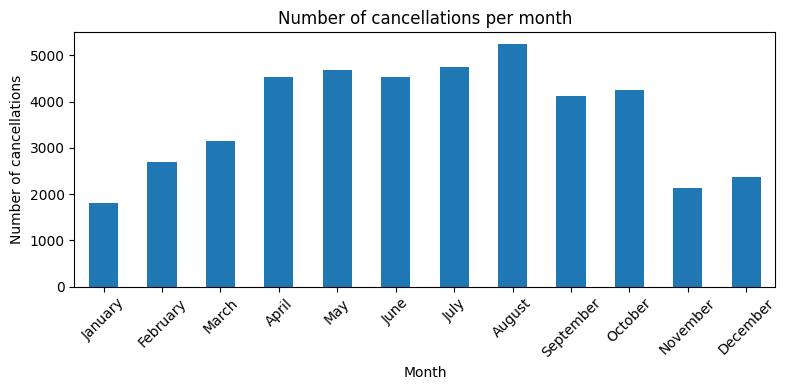

In [242]:
# Sorting the months for a better visualization
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancellations_by_month = cancellations_by_month.reindex(ordered_months)

# plotting
plt.figure(figsize=(8, 4))
cancellations_by_month.plot(kind ='bar')
plt.title('Number of cancellations per month')
plt.xlabel('Month')
plt.ylabel('Number of cancellations')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Question 3: Create a function that prints the percentage of canceled reservations for EACH hotel. (5 points)

In [243]:
# finding how many different hotels are in the dataset
unique_hotels = df['hotel'].unique()
print('Hotels in data set:\n',unique_hotels, '\n\n')

# function to calculate the percentage of canceled reservations for each hotel
def hotel_cancellations(df):

  # finding toatl reservations for each hotel
  total_reservations_per_hotel = df.groupby('hotel').size()

  # finding out the cancellation data for each hotel
  total_cancellation_per_hotel = df.groupby('hotel')['is_canceled'].sum()

  cancelation_percentage_for_each_hotel = (total_cancellation_per_hotel / total_reservations_per_hotel)*100

  for hotel , percentage in cancelation_percentage_for_each_hotel.items():
    print(f"Percentage of canceled reservation for {hotel} is {percentage:.2f}%\n")

hotel_cancellations(df)




Hotels in data set:
 ['Resort Hotel' 'City Hotel'] 


Percentage of canceled reservation for City Hotel is 41.73%

Percentage of canceled reservation for Resort Hotel is 27.76%



Question 4: Filter the dataset so that it only contains visitors who have not canceled their reservations. Store this dataset as a separate variable (we will be using it going forward). (5 points)

In [244]:
# to find the visitors who did not cancelled their reservations, we add all the rows with 0 in the 'is_cancelled' column

non_canceled_reservations = df[df['is_canceled'] == 0]
non_canceled_reservations.head().style.hide_index()

<ipython-input-244-9f1ec60b95e5>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  non_canceled_reservations.head().style.hide_index()


id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.000000,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,nan,0,Transient,75.000000,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,nan,0,Transient,98.000000,0,1,Check-Out,2015-07-03


Question 5A: Using the filtered dataset from Question 4, create a plot for each hotel showing the number of reservations for each month of arrival. Draw a conclusion on whether the trend is the same between the two hotels (in a sentence or two). (2.5 points)

<Figure size 800x400 with 0 Axes>

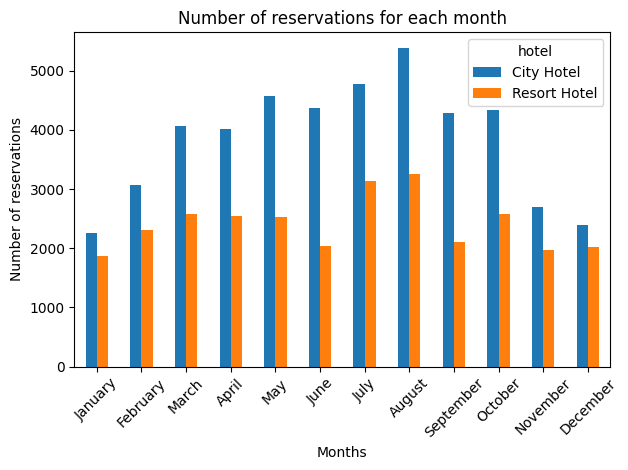

In [245]:
# Group by hotel and month, then count reservations for each group
# unstack() is used to pivot the hotel level of index to column
reservations_by_month = non_canceled_reservations.groupby(['arrival_date_month','hotel']).size().unstack()

# Sorting the months for better visualisation
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
reservations_by_month = reservations_by_month.reindex(ordered_months)

#plotting
plt.figure(figsize = (8,4))
reservations_by_month.plot(kind = 'bar')
plt.title("Number of reservations for each month")
plt.xlabel('Months')
plt.ylabel('Number of reservations')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()







Conclusion:
1. Both hotels shows a incerase in reservations during the months of July and August, and reservations peaked in August.
2. The overall tred of reservations throughout the year is almost similar for both hotels, but reservations in months of Sept and Nov for City Hotel have a more significant drop than Resort hotel.


Question 5B: Using the filtered dataset from Question 4, create a plot for each hotel showing the number of reservations for each month of arrival, delineated by whether or not there are children (or babies) present on the reservation. (2.5 points)

<ipython-input-246-e01bb4d40a2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_non_cancelled_reservations['having_children_or_babies'] = (city_non_cancelled_reservations['children'] > 0) | (city_non_cancelled_reservations['babies'] > 0)
<ipython-input-246-e01bb4d40a2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_non_cancelled_reservations['having_children_or_babies'] = (resort_non_cancelled_reservations['children'] > 0) | (resort_non_cancelled_reservations['babies'] > 0)


<Figure size 1000x400 with 0 Axes>

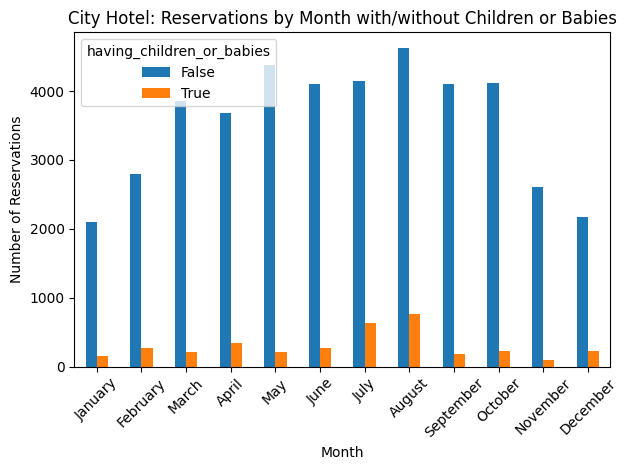

<Figure size 1000x400 with 0 Axes>

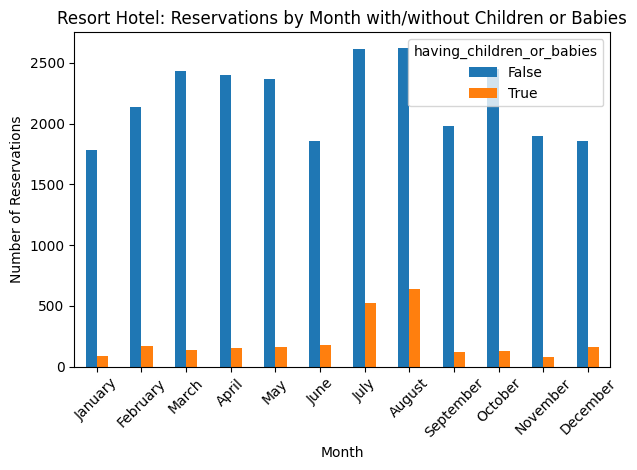

In [246]:
# Seperating the non_cancelled_reservations for city hotel and resort hotel
city_non_cancelled_reservations = non_canceled_reservations[non_canceled_reservations['hotel'] == 'City Hotel']
resort_non_cancelled_reservations = non_canceled_reservations[non_canceled_reservations['hotel'] == 'Resort Hotel']

# Add column to indicate if a reservation has children or babies, will add true or false to column
city_non_cancelled_reservations['having_children_or_babies'] = (city_non_cancelled_reservations['children'] > 0) | (city_non_cancelled_reservations['babies'] > 0)
resort_non_cancelled_reservations['having_children_or_babies'] = (resort_non_cancelled_reservations['children'] > 0) | (resort_non_cancelled_reservations['babies'] > 0)

# Group by month and whether or not there are children or babies and pivot the having_children_or_babies to columns
city_grouped = city_non_cancelled_reservations.groupby(['arrival_date_month', 'having_children_or_babies']).size().unstack()
resort_grouped = resort_non_cancelled_reservations.groupby(['arrival_date_month', 'having_children_or_babies']).size().unstack()

ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
city_grouped = city_grouped.reindex(ordered_months)
resort_grouped = resort_grouped.reindex(ordered_months)

# Plot for City Hotel
plt.figure(figsize=(10,4))
city_grouped.plot(kind='bar')
plt.title("City Hotel: Reservations by Month with/without Children or Babies")
plt.ylabel("Number of Reservations")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Resort Hotel
plt.figure(figsize=(10,4))
resort_grouped.plot(kind='bar')
plt.title("Resort Hotel: Reservations by Month with/without Children or Babies")
plt.ylabel("Number of Reservations")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# with respect to the warning below, the original non_cancelled_reservations dataframe is NOT being modified
# modified dataframes : city_non_cancelled_reservations and resort_non_cancelled_reservations





Question 6: Using the filtered dataset from Question 4, create a single column for "arrival_date" that shows the date of arrival in Year-Month-Day format. (5 points)

In [247]:
# Create the 'arrival_date' column by combining year, month, and day columns as strings and using to_datetime from pandas
non_canceled_reservations['arrival_date'] = pd.to_datetime(
    non_canceled_reservations['arrival_date_year'].astype(str) + '-' +
    non_canceled_reservations['arrival_date_month'].astype(str) + '-' +
    non_canceled_reservations['arrival_date_day_of_month'].astype(str)
    )

# To remove the time stamps used dt.date
non_canceled_reservations['arrival_date'] = non_canceled_reservations['arrival_date'].dt.date

# Display the arrival_date column
non_canceled_reservations[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head().style

<ipython-input-247-a1bf529690af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_canceled_reservations['arrival_date'] = pd.to_datetime(
<ipython-input-247-a1bf529690af>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_canceled_reservations['arrival_date'] = non_canceled_reservations['arrival_date'].dt.date


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-01
3,2015,July,1,2015-07-01
4,2015,July,1,2015-07-01


Question 7A: Create a new dataframe that contains the date of arrival and the number of reservations arriving on that particular day. Sort that dataframe by number of daily reservations, from highest to lowest. Display the first 20 rows of the dataframe. (2.5 points)

In [248]:

# Grouping the reservations by arrival date
reservations_by_date = non_canceled_reservations.groupby(['arrival_date']).size().reset_index(name='number_of_reservations')

# Sorting the reservations in descending order
reservations_by_date = reservations_by_date.sort_values(by = 'number_of_reservations', ascending = False)


reservations_by_date.head(20).style.hide_index()

<ipython-input-248-b862e4638518>:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  reservations_by_date.head(20).style.hide_index()


arrival_date,number_of_reservations
2015-12-05,255
2016-06-24,220
2016-05-26,213
2016-06-06,200
2017-05-25,190
2017-02-25,189
2015-10-15,188
2016-03-24,184
2015-10-02,183
2016-05-02,181


Question 7B: Visualize the data from Question 7A as a line plot. (2.5 points)

<Figure size 640x480 with 0 Axes>

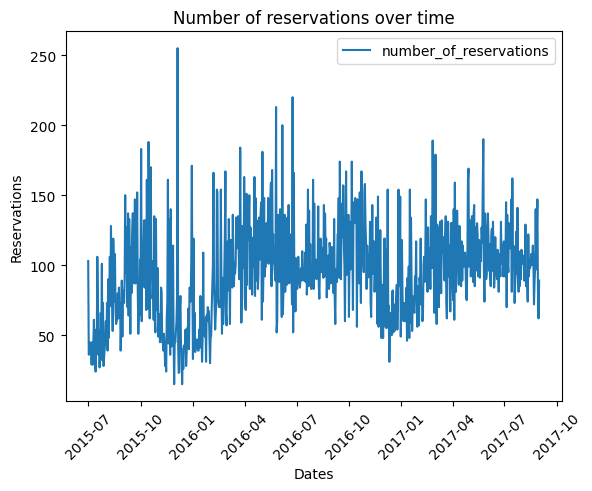

In [249]:
plt.figure()
reservations_by_date.plot(x ='arrival_date', y ='number_of_reservations', kind = 'line')
plt.title('Number of reservations over time')
plt.xlabel('Dates')
plt.ylabel('Reservations')
plt.xticks(rotation = 45)
plt.show()

Question 8A: What is the average daily reservation rate by hotel and customer type? Print your results in a dataframe and display all rows. (2.5 points)

In [250]:
#finding total number of days including the days when there were 0 reservations

max_date = non_canceled_reservations['arrival_date'].max()
min_date = non_canceled_reservations['arrival_date'].min()

total_days = (max_date - min_date).days
total_days

# first we calculated the total reservations for each combination of hotel and customer type
reservations_by_hotel_customer = non_canceled_reservations.groupby(['hotel', 'customer_type']).size().reset_index(name = 'total_reservations')
reservations_by_hotel_customer

# average daily reservation for each combination of hotel and customer type
# Calculate the daily average reservations by dividing total_reservations by total_days

reservations_by_hotel_customer['average_daily_reservations'] = reservations_by_hotel_customer['total_reservations'] / total_days
reservations_by_hotel_customer


,hotel,customer_type,total_reservations,average_daily_reservations
0,City Hotel,Contract,1195,1.508838
1,City Hotel,Group,264,0.333333
2,City Hotel,Transient,32306,40.790404
3,City Hotel,Transient-Party,12463,15.736111
4,Resort Hotel,Contract,1619,2.044192
5,Resort Hotel,Group,254,0.320707
6,Resort Hotel,Transient,20793,26.253788
7,Resort Hotel,Transient-Party,6272,7.919192


Question 8B: Plot the dataframe from Question 8A as a boxplot. (2.5 points)

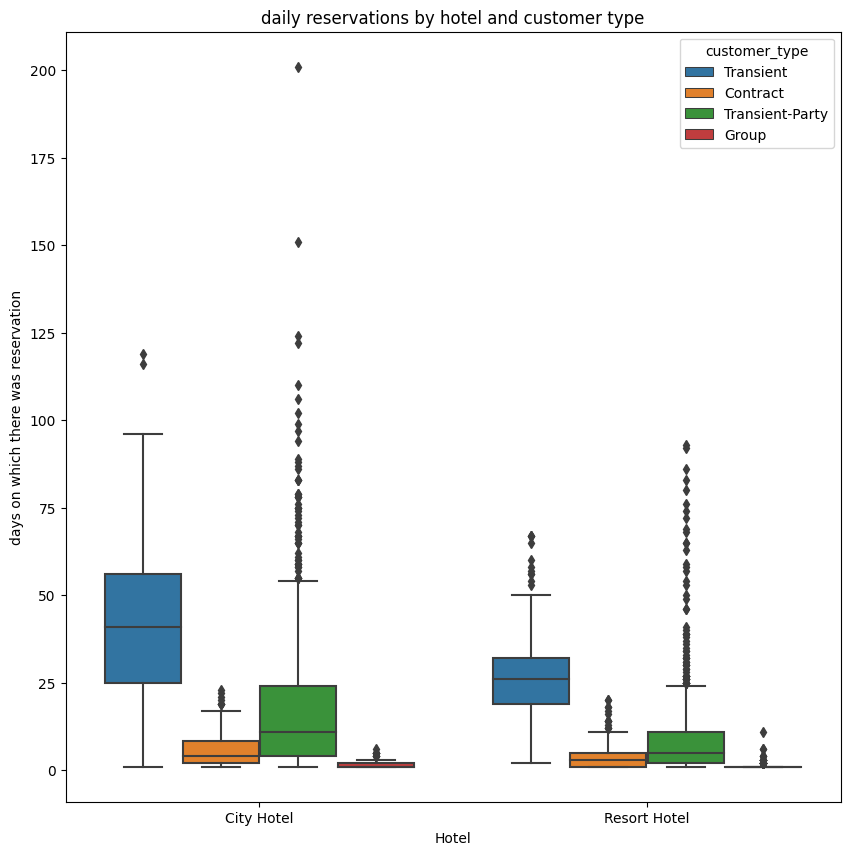

In [251]:
# first create a column for all the days between min and max date inclusive
# essentially a sequence of dates
date_range = pd.date_range(min_date, max_date)

# converting this date range column to a dataframe
df_dates = pd.DataFrame(date_range, columns=['arrival_date'])


df_copy = non_canceled_reservations.copy()
df_copy['arrival_date'] = pd.to_datetime(df_copy['arrival_date'])


# merging the sequence of dates dataframe with the copy of non_cancled_reservations dataframe on arrival_date column
merged_dataframe = pd.merge(df_dates,
                     df_copy,
                     on='arrival_date',
                     how='left')
# Group by arrival_date, hotel, and customer type, then count the number of reservations on each date
daily_reservations = merged_dataframe.groupby(['arrival_date', 'hotel', 'customer_type']).size().reset_index(name='daily_count')
daily_reservations

plt.figure(figsize=(10, 10))
sns.boxplot(data = daily_reservations, x= 'hotel', y= 'daily_count', hue ='customer_type')
plt.title('daily reservations by hotel and customer type')
plt.xlabel('Hotel')
plt.ylabel('days on which there was reservation')
plt.show()

Question 9A: Import the "Country Codes and Coordinates" spreadsheet into your environment, and merge it with your filtered dataset from Question 4. Display the top 10 countries by number of reservations. (2.5 points)

In [252]:
#from_drive = '/content/drive/MyDrive/MSAI339 HW1/country_codes_and_coordinates - countries_codes_and_coordinates.csv'

print('upload the country codes and coordinates csv file')

upload the country codes and coordinates csv file


In [253]:
country_codes_and_coordinates = pd.read_csv('country_codes_and_coordinates - countries_codes_and_coordinates.csv')

#print("Columns in non_canceled_reservations: ", non_canceled_reservations.columns)
#print("Columns in country_codes_and_coordinates: ", country_codes_and_coordinates.columns)


country_codes_and_coordinates.rename(columns={'Country': 'country_name',
                   'Alpha-3 code': 'country'}, inplace=True)

merged_df = non_canceled_reservations.merge(country_codes_and_coordinates, on='country', how='left')


reservation_by_countries = merged_df.groupby('country_name').size().reset_index(name = 'countries_by_reservations').sort_values(by='countries_by_reservations', ascending=False)
reservation_by_countries.head(10)



,country_name,countries_by_reservations
123,Portugal,21071
162,United Kingdom,9676
53,France,8481
144,Spain,6391
58,Germany,6069
72,Ireland,2543
74,Italy,2433
18,Belgium,1868
110,Netherlands,1717
163,United States,1596


Question 9B: Visualize the data from Question 9A as a horizontal bar plot. (2.5 points)

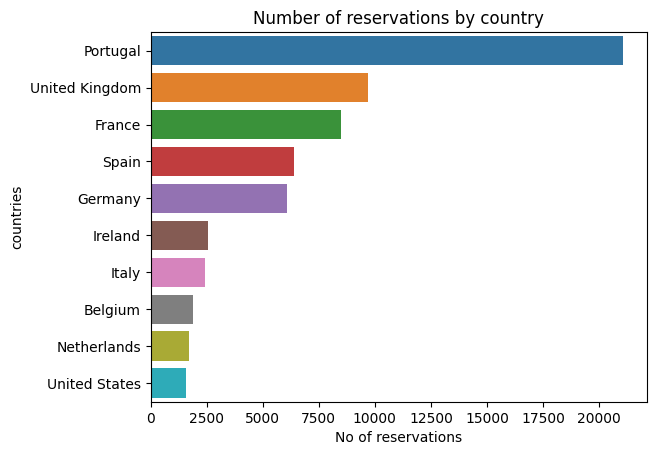

In [254]:
plt.figure()
sns.barplot(data = reservation_by_countries.head(10), x= 'countries_by_reservations', y = 'country_name')
plt.title('Number of reservations by country')
plt.xlabel('No of reservations')
plt.ylabel('countries')
plt.show()

Question 10A: How many guests (including children and babies) are present on the average reservation? (2.5 points)

In [255]:
merged_df['total_guests'] = merged_df['adults'] + merged_df['children'] + merged_df['babies']

guests_on_avg_reservation = merged_df['total_guests'].sum()/merged_df.shape[0]
print(f'average guest per reservation are: {guests_on_avg_reservation}')



average guest per reservation are: 1.94264167888321


Question 10B: True or False - Hotels below the equator have a higher average number of guests on reservations. (2.5 points)

In [256]:
# creating a new column 'position' in merged_df, where the countries above equator i.e. latitude > 0 will be marked 1 and
# countries below equator i.e. latitude < 0 will be marked 0

#print(merged_df.columns)
#print(non_canceled_reservations.columns)


merged_df['position'] = (merged_df['Latitude (average)'] > 0)*1

# to find the average guests per reservation above and below equator we count the rows by looking at the values in the column 'position'

reservations_above_equator = (merged_df['position'] ).sum()
reservations_below_equator = len(merged_df) - reservations_above_equator

#print(reservations_above_equator)
#print(reservations_below_equator)

guests_above_equator = merged_df.loc[merged_df['position'] == 1, 'total_guests'].sum()
guests_below_equator = merged_df.loc[merged_df['position'] == 0, 'total_guests'].sum()

#print(guests_above_equator)
#print(guests_below_equator)


avg_guest_above_equator = guests_above_equator/reservations_above_equator
avg_guest_below_equator = guests_below_equator/reservations_below_equator

print(f'avg guests above equator per reservation are: {avg_guest_above_equator}')
print(f'avg guests below equator per reservation are: {avg_guest_below_equator}')




avg guests above equator per reservation are: 1.9398150079977745
avg guests below equator per reservation are: 1.9958137100994244


True, the hotels below equator have slightly more average guests per reservation